In [129]:
import glob
# This file should run basically insta fast. Bad coding for sure 
# There is a place where i sometimes comment out lin/rbf/sigmoid stuff
# Dont do that, it really helps for some subjects. 
# Anything. Leave only linear. For fast testing of best features
# But dont do that either. 

genSavePath = "F:/PythonProjects/NietoExcercise-1/SavedResults/"
day = "15" # Which month and days result you want to visualize in table
month = 11

repetitionValue = 4 
repetitionName =  "newStraSplitTest"#  "udrli1feattestanglnoBC"  # "udrliplotnoAda3"  #  "udrlBC4CVTest" # 
#  "udrliplotnoAda3hyperparams" 
repetitionString = f"{repetitionValue}{repetitionName}"
curSavePath = f"{genSavePath}{day}-{month}-{repetitionString}/"
savedResults = glob.glob(curSavePath + "savedBest*")

saveTop = False
if saveTop:
    saveTopName = "top4udrli.npy"
else:
    saveTopName = None
topAmount = 20
skipSubjects = []
onlySignificant = True
minAcc = 0.1
print(len(savedResults))
print(len(savedResults)/9)

85
9.444444444444445


In [130]:
import pandas as pd
from array import ArrayType
from requests import delete
import numpy as np


nameDict = dict()
nrOfNames = 0
kernelDict = dict()
nrOfKernel = 0

currSeed = 0
currSubj = 0
combinationList = []


testInfoPerSubject = [None] * 10

results = []
for path in savedResults:
    results.append(np.load(path, allow_pickle=True))

subjectAmount = 10
    
for subject in results:
    currSubj = subject[1]
    testInfoPerSubject[currSubj] = subject[0]
soloFeatures = []
featCombos = []
kernels = testInfoPerSubject[1][2][0]
regValues = testInfoPerSubject[1][2][1]
paradigmName = testInfoPerSubject[1][3]
for subinfo in testInfoPerSubject[1:]:
    subSoloFeatures = subinfo[0]
    subfeatCombos = subinfo[1]
    if len(soloFeatures) < len(subSoloFeatures):
        soloFeatures = subSoloFeatures
    if len(featCombos) < len(subfeatCombos):
        featCombos = subfeatCombos
    #print(subinfo)
allCombinations = []
comboNumber = 0
combinationDict = dict()
for featCombo in featCombos:
    for kernel in kernels:
        for regValue in regValues:
            allCombinations.append([featCombo, kernel, regValue, comboNumber])
            combinationDict[f"{featCombo},{kernel},{regValue}"] = comboNumber
            comboNumber = comboNumber + 1
           
print(len(allCombinations))
nrOfCombination = len(allCombinations)
# print(soloFeatures)
# print(featCombos)
# print(kernels)
# print(regValue)
# print(paradigmName)
combinationResult = np.zeros([subjectAmount, len(allCombinations), 2])
nrOfSeedsPerSubject = np.zeros(subjectAmount)
for s, subject in enumerate(results):
    currSubj = 0
    currSeed = 0
    subjectBestArray = np.empty([len(subject)], dtype=object)

    
    currSubj = subject[1]
    testInfoPerSubject[currSubj] = subject[0]
    if currSubj in skipSubjects:
        continue
    nrOfSeedsPerSubject[currSubj] += 1

    for aResults in subject[2]:
        for aResults2 in aResults:
            # If the np array comes from svm results
            if len(aResults2) < 6:

                aName = aResults2[0]
                ares = aResults2[1]

                if type(ares) is tuple:
                    ares = ares[0]
                if ares > 0.98:
                    ares = 0.99
                akernel = aResults2[2]
            
                aC = aResults2[3]
                
                
                # for comb in allCombinations:
                #     if aName == comb[0] and akernel == comb[1] and aC == comb[2]:
                #         #print(comb)
                #         #print(comb[3]
                combinationResult[currSubj, combinationDict[f"{aName},{akernel},{aC}"]] = [int(combinationDict[f"{aName},{akernel},{aC}"]), 
                                                                                           combinationResult[currSubj, combinationDict[f"{aName},{akernel},{aC}"]][1] + ares]
                

            #     if aName not in nameDict:
            #         nameDict[aName] = nrOfNames
            #         nrOfNames += 1
            #     if akernel not in kernelDict:
            #         kernelDict[akernel] = nrOfKernel
            #         nrOfKernel += 1
            #     if [nameDict[aName], kernelDict[akernel], aC] not in combinationList:
            #         combinationList.append([nameDict[aName], kernelDict[akernel], aC])
            #         nrOfCombination += 1

            #     combNr = combinationList.index(
            #         [nameDict[aName], kernelDict[akernel], aC]
            #     )
            #     if any(combNr in sublist for sublist in combinationResult[currSubj]):
            #         sublist = np.array(combinationResult[currSubj])
                    
            #         index = int(np.where(sublist[:, 0] == combNr)[0])

            #         combinationResult[currSubj][index][1] = combinationResult[currSubj][
            #             index
            #         ][1] * (1 - (1 / nrOfSeedsPerSubject[currSubj])) + ares * (
            #             1 / nrOfSeedsPerSubject[currSubj]
            #         )

            #     else:

            #         combinationResult[currSubj].append([combNr, ares])

            #         # If the np array comes from NN results
            # else:

            #     aName = aResults2[0]
            #     ares = aResults2[1]

            #     if type(ares) is tuple:
            #         ares = ares[0]
            #     akernel = aResults2[2]
            #     aLz = round(aResults2[3], 2)
            #     areg = round(aResults2[4], 2)
            #     adrp = round(aResults2[5], 2)
            #     if aName not in nameDict:
            #         nameDict[aName] = nrOfNames
            #         nrOfNames += 1
            #     if akernel not in kernelDict:
            #         kernelDict[akernel] = nrOfKernel
            #         nrOfKernel += 1
            #     if [
            #         nameDict[aName],
            #         kernelDict[akernel],
            #         aLz,
            #         areg,
            #         adrp,
            #     ] not in combinationList:
            #         combinationList.append(
            #             [nameDict[aName], kernelDict[akernel], aLz, areg, adrp]
            #         )
            #         nrOfCombination += 1
            #     # combResult = []
            #     combNr = combinationList.index(
            #         [nameDict[aName], kernelDict[akernel], aLz, areg, adrp]
            #     )
            #     if any(combNr in sublist for sublist in combinationResult[currSubj]):
            #         sublist = np.array(combinationResult[currSubj])
                  
            #         index = int(np.where(sublist[:, 0] == combNr)[0])

            #         combinationResult[currSubj][index][1] = combinationResult[currSubj][
            #             index
            #         ][1] * (1 - (1 / nrOfSeedsPerSubject[currSubj])) + ares * (
            #             1 / nrOfSeedsPerSubject[currSubj]
            #         )

            #     else:

            #         combinationResult[currSubj].append([combNr, ares])

# Making table

for subNr, subj in enumerate(combinationResult[1:], 1):
    combinationResult[subNr,:, 1] = combinationResult[subNr,:, 1] / nrOfSeedsPerSubject[subNr]
# headers = [f"{x[0]}:{x[1]}:{x[2]}:" for x in combinationList]
headers = np.arange(nrOfCombination)
subjectResultArray = np.empty([10, nrOfCombination], dtype=object)
subjectNrList = []

comboAverage = np.zeros([1, nrOfCombination])
comboTotal = np.zeros([1, nrOfCombination])
nrOfSubjects = np.zeros(nrOfCombination)

topTen = []
topThreeAllSubjects = []
#nameArray = np.array(list(nameDict))

topPerFeature = np.zeros([10, len(featCombos)])

lowestTopRes = [0, 0]
for subNr, cResult in enumerate(combinationResult):
    topThreeThisSubject = []
    resArray = np.zeros([nrOfCombination])
    if len(cResult) != 0:
        for res in cResult:
       

            cmbNr = int(res[0])

            if onlySignificant == True:
                if res[1] < minAcc:
                    continue
            comboAverage[0, cmbNr] = comboAverage[0, cmbNr] + res[1]
            comboTotal[0, cmbNr] = comboTotal[0, cmbNr] + res[1]
            nrOfSubjects[cmbNr] += 1
            subjectResultArray[subNr, cmbNr] = res[1]
            comboName = allCombinations[cmbNr][0]
            # comboName = list(nameDict.keys())[combinationList[cmbNr][0]]

            nameIndex = [i for i, elem in enumerate(featCombos) if comboName == elem][0]
            
            # print(res)
            if res[1] > topPerFeature[subNr, nameIndex]:
                topPerFeature[subNr, nameIndex] = res[1]

            if len(topTen) < 10 or topTen[0][0] < res[1]:

                if len(topTen) == 10:
                    topTen.reverse()
                    topTen.pop()

                dataF = allCombinations[cmbNr][0]
                kernel =  allCombinations[cmbNr][1]
                cVal =  allCombinations[cmbNr][2]
                #list(nameDict.keys())[combinationList[cmbNr][0]]
                #kernel = kernels #list(kernelDict.keys())[combinationList[cmbNr][1]]
                #cVal = combinationList[cmbNr][2]
                topTen.append([res[1], subNr, dataF, kernel, cVal])
                topTen.sort()

            
            
            if len(topThreeThisSubject) < 2 or topThreeThisSubject[0][0] < res[1]:

                if len(topThreeThisSubject) == 2:
                    topThreeThisSubject.reverse()
                    topThreeThisSubject.pop()
                dataF = allCombinations[cmbNr][0]
                kernel =  allCombinations[cmbNr][1]
                cVal =  allCombinations[cmbNr][2]
                topThreeThisSubject.append([res[1], subNr, dataF, kernel, cVal])
                topThreeThisSubject.sort()
    if len(topThreeThisSubject)>0:
        topThreeAllSubjects.append(topThreeThisSubject)
# Print the table!
comboAverage = comboAverage / nrOfSubjects
# print(comboAverage.shape)
# print(subjectResultArray.shape)
pd.set_option("display.max_columns", None)

# For loop through zip of headers and columns,
# If column has all values == None, Remove column and header.
subjectResultArray = np.array(subjectResultArray)
emptyCols = []
atleastOneEmpty = False
for hcol, in zip(headers):
    if all(subjectResultArray[:,hcol] == None):
        atleastOneEmpty = True
        emptyCols.append(hcol)
if atleastOneEmpty: 
    subjectResultArray = np.delete(subjectResultArray, np.array(emptyCols),1)
    headers = np.delete(headers, np.array(emptyCols),0)
    comboAverage = np.delete(comboAverage, np.array(emptyCols),1)
    comboTotal = np.delete(comboTotal, np.array(emptyCols),1)
    nrOfSubjects = np.delete(nrOfSubjects, np.array(emptyCols),0)


table = pd.DataFrame(subjectResultArray, columns=headers)
display(table)
# print(subjectResultArray)
# print(combinationResult)



1134


0         1         2         3         4         5         6     \
0      None      None      None      None      None      None      None   
1  0.202778  0.227778  0.219444  0.219444  0.238889  0.236111  0.272222   
2  0.222222  0.219907  0.212963  0.226852  0.222222  0.233796  0.261574   
3  0.291667  0.252778  0.305556  0.263889  0.241667  0.205556      0.25   
4  0.266667      0.25  0.260417   0.21875  0.214583  0.252083     0.225   
5  0.266667  0.241667    0.2375  0.247917  0.222917   0.26875    0.2375   
6  0.254545      0.25  0.234091     0.275  0.288636  0.263636  0.209091   
7   0.25463  0.229167   0.25463  0.222222  0.231481  0.233796  0.252315   
8  0.258333  0.252778  0.277778  0.238889  0.191667  0.247222  0.280556   
9  0.229167  0.175926  0.206019  0.291667  0.310185  0.321759  0.219907   

       7         8         9         10        11        12        13    \
0      None      None      None      None      None      None      None   
1  0.283333  0.263889  0.455556  0.472222  0.430556      None      None   
2  0.217593  0.256944  0.439815  0.486111   0.37037      None      None   
3  0.211111  0.230556  0.361111  0.288889  0.252778      None      None   
4     0.225  0.208333  0.527083     0.525  0.472917      None      None   
5  0.239583  0.272917  0.566667  0.597917   0.46875  0.683333  0.708333   
6  0.188636  0.170455  0.409091  0.427273  0.429545      None      None   
7  0.256944   0.25463  0.511574  0.490741  0.416667  0.583333  0.564815   
8  0.316667  0.280556  0.686111  0.680556  0.669444  0.711111  0.713889   
9  0.224537  0.236111  0.296296    0.3125      0.25      None      None   

       14        15        16        17        18        19        20    \
0      None      None      None      None      None      None      None   
1      None  0.305556       0.3       0.3  0.691667  0.694444       0.7   
2      None  0.289352  0.356481  0.303241  0.729167  0.782407  0.703704   
3      None  0.383333  0.327778  0.336111  0.680556  0.702778  0.691667   
4      None  0.520833  0.529167  0.402083    0.7125   0.71875  0.683333   
5  0.604167   0.59375   0.64375  0.514583  0.691667       0.7   0.66875   
6      None  0.370455  0.415909  0.431818  0.706818  0.684091  0.688636   
7  0.553241  0.400463  0.333333  0.321759  0.678241  0.678241  0.685185   
8  0.708333  0.672222  0.647222  0.505556  0.711111  0.713889  0.708333   
9      None  0.365741  0.314815  0.314815  0.710648  0.729167  0.731481   

       21        22        23        24        25        26        27    \
0      None      None      None      None      None      None      None   
1  0.636111  0.619444  0.627778      0.65  0.666667  0.688889  0.680556   
2  0.715278  0.701389  0.729167  0.671296  0.680556  0.657407  0.599537   
3     0.675  0.683333  0.686111  0.552778     0.575  0.630556  0.644444   
4  0.672917  0.704167  0.691667  0.558333  0.645833  0.585417  0.660417   
5  0.685417   0.73125  0.710417  0.616667  0.639583    0.6875  0.652083   
6  0.645455  0.643182  0.686364      0.65  0.686364  0.638636  0.643182   
7  0.648148  0.696759   0.69213   0.62037   0.62037  0.634259  0.701389   
8  0.669444  0.722222  0.719444  0.672222  0.694444     0.675  0.708333   
9  0.597222  0.641204  0.604167   0.55787  0.597222  0.592593  0.493056   

       28        29        30        31        32        33        34    \
0      None      None      None      None      None      None      None   
1  0.672222  0.602778     0.625  0.666667  0.719444  0.597222      0.65   
2  0.592593  0.657407  0.576389  0.622685  0.613426  0.590278  0.627315   
3  0.652778  0.591667       0.6  0.591667  0.608333  0.611111  0.644444   
4  0.654167     0.625  0.591667    0.6375  0.608333  0.570833  0.664583   
5   0.69375   0.64375  0.535417  0.610417  0.635417  0.502083      0.65   
6  0.638636  0.477273  0.554545  0.588636  0.588636  0.611364  0.652273   
7   0.69213  0.650463  0.511574  0.576389  0.636574  0.585648  0.701389   
8  0.708333  0.708333  0.608

In [131]:
# soloFeatures = []
# featCombos = []
# kernels = testInfoPerSubject[1][2][0]
# regValue = testInfoPerSubject[1][2][1]
# paradigmName = testInfoPerSubject[1][3]
# for subinfo in testInfoPerSubject[1:]:
#     subSoloFeatures = subinfo[0]
#     subfeatCombos = subinfo[1]
#     if len(soloFeatures) < len(subSoloFeatures):
#         soloFeatures = subSoloFeatures
#     if len(featCombos) < len(subfeatCombos):
#         featCombos = subfeatCombos
#     #print(subinfo)
# print(soloFeatures)
# print()
# print(featCombos)
# print(kernels)
# print(regValue)
# print(paradigmName)
    


In [132]:
# x = 0

# pd.set_option("display.max_columns", None)
# print()
# nameDictNrs = np.ones([1, len(nameDict)])
# nameDictNrs[0,:] = np.arange(len(nameDict)) * 3
# print(nameDictNrs.shape)
# #table = pd.DataFrame(nameDictNrs , columns=nameDict.keys())
# table = pd.DataFrame(topPerFeature, columns=nameDict.keys())
# #display(table)
# display(table)


In [133]:
for names in featCombos:
    print(names)

    #print(x)


fftData
welchData
dataHR
dataFFTCV-BC
dataWCV-BC
dataHRCV-BC
fftDataBC
welchDataBC
dataHRBC
dataGCVBC
gaussianDataBC
dataCorr1dBC
inverseFFT-BC
iFFTdataCorr1d01s-BC
iFFTdataCorr1d02s-BC
iFFTdataCorr1d005s-BC
dataCorr1d01sBC
dataCorr1d02sBC
iFFTdataCorr2ax1d005s-BC
1dataCorr2ax1dBC
inverseFFTCV-BC
anglefftDataBC
3dataCorr2ax1dBC
4dataCorr2ax1dBC
5dataCorr2ax1dBC
6dataCorr2ax1dBC
05dataCorr2ax1dBC
welchData&fftData
dataHR&fftData
dataFFTCV-BC&fftData
dataWCV-BC&fftData
dataHRCV-BC&fftData
fftDataBC&fftData
welchDataBC&fftData
dataHRBC&fftData
dataGCVBC&fftData
gaussianDataBC&fftData
dataCorr1dBC&fftData
inverseFFT-BC&fftData
iFFTdataCorr1d01s-BC&fftData
iFFTdataCorr1d02s-BC&fftData
iFFTdataCorr1d005s-BC&fftData
dataCorr1d01sBC&fftData
dataCorr1d02sBC&fftData
iFFTdataCorr2ax1d005s-BC&fftData
1dataCorr2ax1dBC&fftData
inverseFFTCV-BC&fftData
anglefftDataBC&fftData
3dataCorr2ax1dBC&fftData
4dataCorr2ax1dBC&fftData
5dataCorr2ax1dBC&fftData
6dataCorr2ax1dBC&fftData
05dataCorr2ax1dBC&fftData
da

(378,)



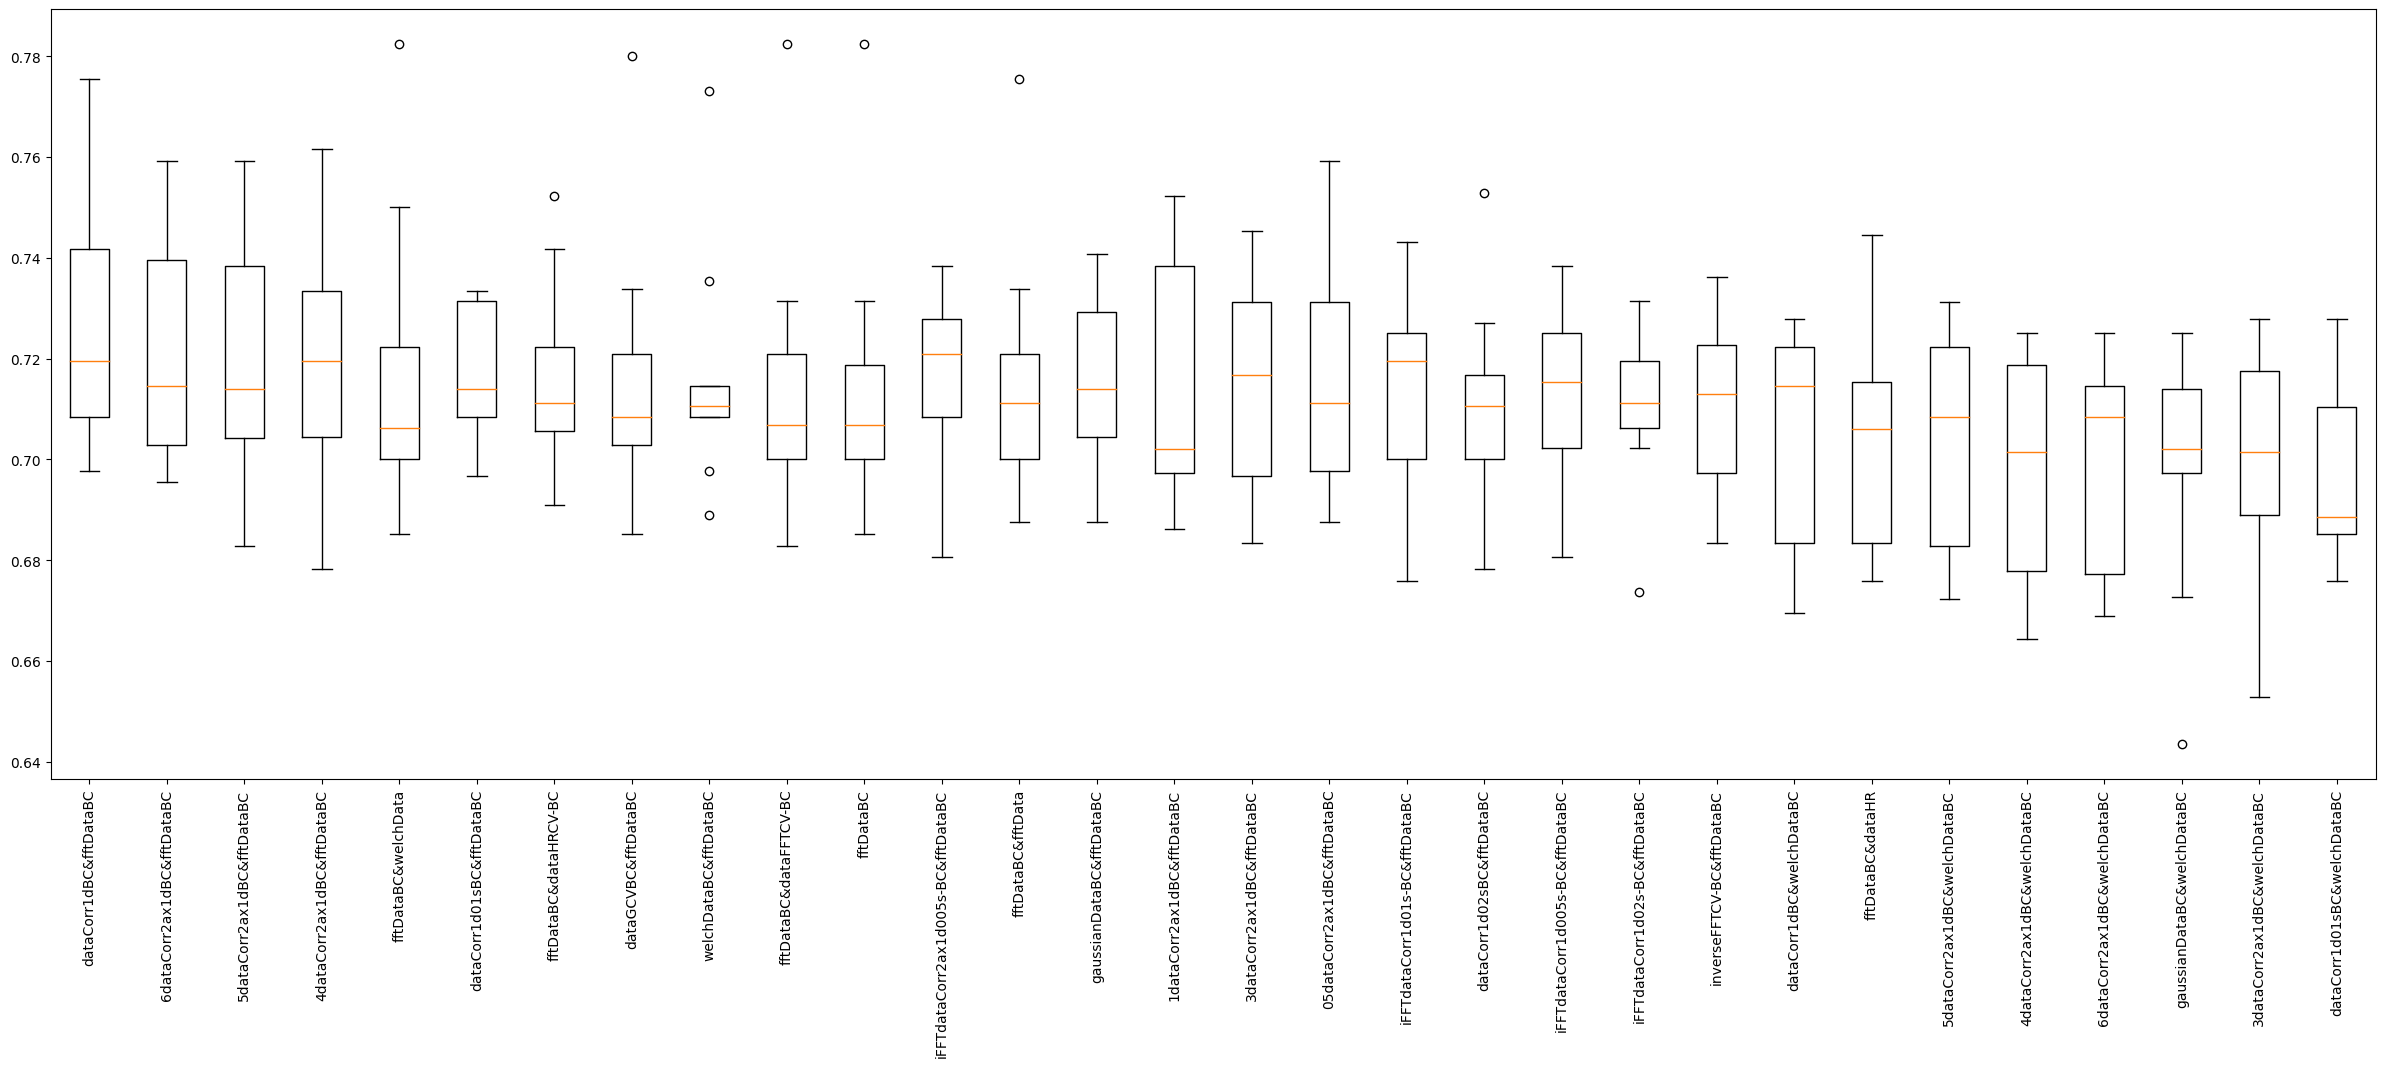

In [134]:
import matplotlib.pyplot as plt
# ordeTopAverage = np.array(np.argsort(comboAverage, axis=1)/(len(combinationList))*len(dataF),dtype=int)
# print(ordeTopAverage)
# print(len(combinationList))
# print(len(dataF))
# print(len(topPerFeature))
# print(len(combinationList)/len(dataF))
#print(ordeTopAverage)
meanTop = np.mean(topPerFeature[1:], axis=0)
#print(meanTop.shape)
indices = np.argsort(meanTop, axis=0)[::-1]
#print(indices)
#indices = np.argsort(topPerFeature[1:], axis=1)[:,::-1][1,:]

#topPerFeature = np.sort(topPerFeature, axis=1)[:,::-1]
#topPerFeature = np.sort(topPerFeature, axis=1)[:,::-1]




print(indices.shape)
featCombos = np.array(featCombos)
#np.argsort(comboAverage, axis=1)
#sortA = np.argsort(topPerFeature, axis = 1)
if len(featCombos) < 50:
    plt.figure(figsize=[30,10])
    plt.boxplot(topPerFeature[1:, indices][:,:30])
    plt.xticks(np.arange(len(featCombos[indices][:30]))+1,featCombos[indices][:30],rotation=45)
    #plt.legend(nameArray)
    print("")
    # plt.figure(figsize=[30,10])
    # plt.boxplot(topPerFeature[1:][:])
    # plt.xticks(np.arange(len(nameArray))+1,nameArray,rotation=45)
    # #plt.legend(nameArray)
    # print("")
else: 
    plt.figure(figsize=[30,10])
    plt.boxplot(topPerFeature[1:, indices][:,:30])
    plt.xticks(np.arange(30)+1,featCombos[indices][:30],rotation=90)
    #plt.legend(nameArray)
    print("")
    


In [135]:
# mbos[indices[0:5]]
indices[0:10]

array([172, 186, 185, 184,  57, 177, 147, 170, 168, 104], dtype=int64)

In [136]:
np.arange(30)  + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [137]:
print("Top ten highest accuracies")

topTen.reverse()
for top in topTen:
    print(
            f"Accuracy {round(top[0],2)} : subject {top[1]}, feature:{top[2]}, kernel{top[3]}, C:{top[4]}"
        )


Top ten highest accuracies
Accuracy 0.78 : subject 2, feature:fftDataBC&welchData, kernelrbf, C:2.5
Accuracy 0.78 : subject 2, feature:fftDataBC&dataFFTCV-BC, kernelrbf, C:2.5
Accuracy 0.78 : subject 2, feature:fftDataBC, kernelrbf, C:2.5
Accuracy 0.78 : subject 2, feature:dataGCVBC&fftDataBC, kernelrbf, C:2.5
Accuracy 0.78 : subject 2, feature:dataCorr1dBC&fftDataBC, kernelrbf, C:2.5
Accuracy 0.78 : subject 2, feature:fftDataBC&fftData, kernelrbf, C:2.5
Accuracy 0.77 : subject 2, feature:welchDataBC&fftDataBC, kernelrbf, C:2.5
Accuracy 0.76 : subject 2, feature:welchDataBC&fftDataBC, kernellinear, C:2.5
Accuracy 0.76 : subject 2, feature:4dataCorr2ax1dBC&fftDataBC, kernelrbf, C:2.5
Accuracy 0.76 : subject 2, feature:6dataCorr2ax1dBC&fftDataBC, kernelrbf, C:2.5


In [138]:
# top for each feature

In [139]:
print("Top ten highest accuracies")
#del(topThreeThisSubject[0])
#len(topThreeAllSubjects[0])
for subTop in topThreeAllSubjects:
    subTop.reverse()
topThreeAllSubjects.sort(reverse=True)
arrayOfTopFeatureNames = []
for subTop in topThreeAllSubjects:
    print("")
    #subTop.reverse()
    for top in subTop[:1]:
        arrayOfTopFeatureNames.append(top[2])
        print(
                f"Accuracy {round(top[0],2)} : subject {top[1]}, feature:{top[2]}, kernel{top[3]}, C:{top[4]}"
            )
#print(arrayOfTopFeatureNames)
arrayOfTopFeatureNames = np.array(arrayOfTopFeatureNames, dtype=object)
#print(np.array(arrayOfTopFeatureNames, dtype=object).shape)
newArrayOfTopFeatureNames = []
for topNames in arrayOfTopFeatureNames:
    # temp = topNames.replace("--","-")
    # temp2 = temp.replace("-B","%")
    splitArray = np.array(topNames.split(" & "), dtype=object)
    # for ind, stri in enumerate(splitArray):
    #     splitArray[ind] = stri.replace("%","-B")
    skip = False  
    for obj in splitArray:
        #print(obj)
        if obj == "":
            #print("aofafa")
            skip = True
    if skip:
        continue
    #print(splitArray)
    newArrayOfTopFeatureNames.append(splitArray)
    
#print(newArrayOfTopFeatureNames)
newArrayOfTopFeatureNames = np.array(newArrayOfTopFeatureNames, dtype=object) 
#saveTopName = "top2udrli"
if saveTopName is not None:
    #print(newArrayOfTopFeatureNames)
    np.save(f"topFeatures/{saveTopName}", newArrayOfTopFeatureNames)
    print("TopFeatureNameArraySaved")
    print(newArrayOfTopFeatureNames)


Top ten highest accuracies

Accuracy 0.78 : subject 2, feature:fftDataBC&welchData, kernelrbf, C:2.5

Accuracy 0.75 : subject 1, feature:dataCorr1d02sBC&fftDataBC, kernelrbf, C:2.5

Accuracy 0.75 : subject 9, feature:fftDataBC&welchData, kernellinear, C:2.5

Accuracy 0.74 : subject 8, feature:fftDataBC&dataHR, kernelrbf, C:2.5

Accuracy 0.74 : subject 4, feature:5dataCorr2ax1dBC&fftDataBC, kernelrbf, C:2.5

Accuracy 0.74 : subject 5, feature:welchDataBC&dataHRCV-BC, kernelrbf, C:2.5

Accuracy 0.73 : subject 6, feature:anglefftDataBC&inverseFFTCV-BC, kernelrbf, C:2.5

Accuracy 0.73 : subject 3, feature:dataCorr1d01sBC&welchDataBC, kernelsigmoid, C:2.5

Accuracy 0.72 : subject 7, feature:dataCorr1dBC&welchDataBC, kernelsigmoid, C:2.5


In [140]:
subjAv = np.zeros(subjectResultArray.shape[0])
for s, subj in enumerate(subjectResultArray):
    subjAv[s] = 0
    if all(subj == None):
        continue
    subjAv[s] = np.mean(subj[np.where(subj != None)])
print(subjAv)
pd.set_option("display.max_columns", None)
table = pd.DataFrame(np.array(comboAverage), columns=headers)
display(table)

print(
    f"Max average accuracy {np.max(np.array(comboAverage[np.where(np.isnan(comboAverage)==False)]))}"
)
maxVal = np.max(np.array(comboAverage[np.where(np.isnan(comboAverage) == False)]))
maxInd = int(np.where(comboAverage == maxVal)[1][0])
# print(headers[maxInd])
# print(nrOfSubjects[maxInd])
# print(list(nameDict.keys())[combinationList[maxInd][0]])
# print(list(kernelDict.keys())[combinationList[maxInd][1]])
# print(f"C: {combinationList[maxInd][2]}")


[0.         0.57635591 0.57692747 0.56417907 0.57372784 0.58727587
 0.58910041 0.57304731 0.64083382 0.54894965]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Max average accuracy 0.7175154320987653


In [141]:
#np.argpartition(comboAverage, -4)
#print(headers[comboAverage.argsort()[0][-5:][::-1]])
top5 = headers[comboAverage.argsort()[0][-5:][::-1]]
top5Vals = comboAverage[0][comboAverage.argsort()[0][-5:][::-1]]
for maxInd,res in zip(top5, top5Vals):
    print(list(featCombos)[combinationList[maxInd][0]])
    print(list(featCombos)[combinationList[maxInd][1]])
    print(res)
    print()

IndexError: list index out of range

In [ ]:
#np.argpartition(comboAverage, -4)
#print(headers[comboAverage.argsort()[0][-5:][::-1]])
top5 = headers[comboTotal.argsort()[0][-5:][::-1]]
top5Vals = comboTotal[0][comboTotal.argsort()[0][-5:][::-1]] /9
for maxInd,res in zip(top5, top5Vals):
    print(list(nameDict.keys())[combinationList[maxInd][0]])
    print(list(kernelDict.keys())[combinationList[maxInd][1]])
    print(res)
    print()

In [ ]:
table = pd.DataFrame(np.array(comboTotal), columns=headers)
display(table)

maxVal2 = np.max(np.array(comboTotal[np.where(np.isnan(comboTotal) == False)]))

for maxInd2 in np.where(comboTotal == maxVal2)[1]:

    # maxInd2 = int(np.where(comboTotal == maxVal2)[1])
    print(headers[maxInd2])
    print(nrOfSubjects[maxInd2])
    print(
        f"Max total significant accuracy then averaged {maxVal2/nrOfSubjects[maxInd2]} "
    )

    print(list(nameDict.keys())[combinationList[maxInd2][0]])
    print(list(kernelDict.keys())[combinationList[maxInd2][1]])
    print(f"C: {combinationList[maxInd2][2]} ")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

517
9.0
Max total significant accuracy then averaged 0.7157009913954356 


IndexError: list index out of range

In [ ]:
# maxAcc = np.max([res for res in np.array(
#     subjectResultArray[subjectResultArray != None])])
# print(f"Max single accuracy position {np.where(subjectResultArray == maxAcc)}")
# print(np.max([res for res in np.array(
#     subjectResultArray[subjectResultArray != None])]))
